



Importing the libraries

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # For saving the best model


Data Sets

In [119]:

df = pd.read_csv("datasets/garments_worker_productivity.csv")

df.head()


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Correlation analysis


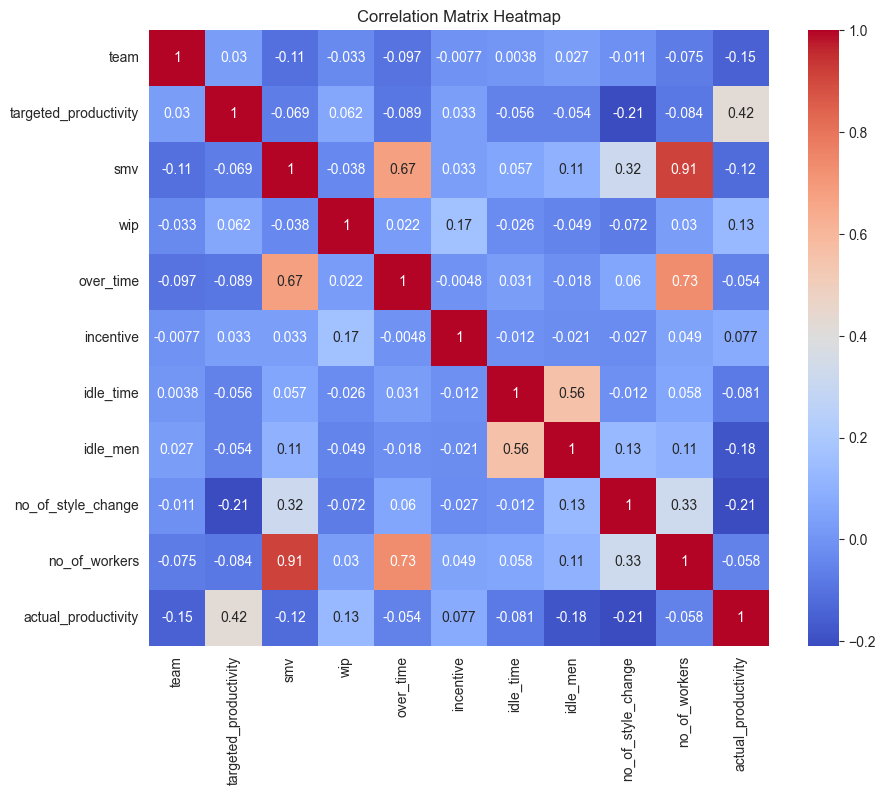

In [120]:

numeric_df = df.select_dtypes(include=['number'])


correlation_matrix = numeric_df.corr()



plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title("Correlation Matrix Heatmap")
plt.show()

Descriptive analysis


In [121]:

df_numeric_summary = df.describe()
print(df_numeric_summary)

              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.00

Checking for null values


In [122]:

null_values = df.isnull().sum()

print("Null values in each feature:")
print(null_values)

Null values in each feature:
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [123]:

df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [124]:

df['month'] = df['date'].dt.month

In [125]:

print(df.columns)

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity', 'month'],
      dtype='object')


Handling Date & department column


In [126]:

df['department'] = df['department'].str.strip().str.lower()

df['department'] = df['department'].replace({'finishing': 'finishing', 'sweing': 'sewing'})

In [127]:

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month
df = df.drop(columns=['date'])

df['department'] = df['department'].str.strip().str.lower()
df['department'] = df['department'].replace({'finishing  ': 'finishing', 'sweing': 'sewing'})


print(df.head())

    quarter department       day  team  targeted_productivity    smv     wip  \
0  Quarter1     sewing  Thursday     8                   0.80  26.16  1108.0   
1  Quarter1  finishing  Thursday     1                   0.75   3.94     NaN   
2  Quarter1     sewing  Thursday    11                   0.80  11.41   968.0   
3  Quarter1     sewing  Thursday    12                   0.80  11.41   968.0   
4  Quarter1     sewing  Thursday     6                   0.80  25.90  1170.0   

   over_time  incentive  idle_time  idle_men  no_of_style_change  \
0       7080         98        0.0         0                   0   
1        960          0        0.0         0                   0   
2       3660         50        0.0         0                   0   
3       3660         50        0.0         0                   0   
4       1920         50        0.0         0                   0   

   no_of_workers  actual_productivity  month  
0           59.0             0.940725      1  
1            8.0

Handling Categorical Values and Splitting data into train and test

In [128]:

class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns
        self.encoders = {}

    def fit_transform(self, X):
        if self.columns is not None:
            for col in self.columns:
                le = LabelEncoder()
                X[col] = le.fit_transform(X[col])
                self.encoders[col] = le
        return X

                          # Define categorical columns
categorical_columns = ['quarter', 'department', 'day']

                        # Encode categorical data
encoder = MultiColumnLabelEncoder(columns=categorical_columns)
df = encoder.fit_transform(df)

print(df.head())

                                # Splitting Data
X = df.drop(columns=['actual_productivity'])
y = df['actual_productivity']

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

print("\n✅ Data split successfully!")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


   quarter  department  day  team  targeted_productivity    smv     wip  \
0        0           1    3     8                   0.80  26.16  1108.0   
1        0           0    3     1                   0.75   3.94     NaN   
2        0           1    3    11                   0.80  11.41   968.0   
3        0           1    3    12                   0.80  11.41   968.0   
4        0           1    3     6                   0.80  25.90  1170.0   

   over_time  incentive  idle_time  idle_men  no_of_style_change  \
0       7080         98        0.0         0                   0   
1        960          0        0.0         0                   0   
2       3660         50        0.0         0                   0   
3       3660         50        0.0         0                   0   
4       1920         50        0.0         0                   0   

   no_of_workers  actual_productivity  month  
0           59.0             0.940725      1  
1            8.0             0.886500      1  

Model Building


Linear Regression


In [129]:

df.fillna(df.mean(), inplace=True)


X = df.drop(columns=['actual_productivity'])
y = df['actual_productivity']


X_array = X.values

# Split the dataset for  training and testing

X_train, X_test, y_train, y_test = train_test_split(X_array, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()


model_lr.fit(X_train, y_train)

pred_test = model_lr.predict(X_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2 = r2_score(y_test, pred_test)

print(" Mean Absolute Error (MAE):", mae)
print(" Mean Squared Error (MSE):", mse)
print(" R² Score:", r2)


 Mean Absolute Error (MAE): 0.10729554202727523
 Mean Squared Error (MSE): 0.021321517772633032
 R² Score: 0.1970042499190814


RandomForestRegression


In [130]:

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train)

pred = model_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, pred)
mse_rf = mean_squared_error(y_test, pred)
r2_rf = r2_score(y_test, pred)


print("🔹 Random Forest Regression Metrics:")
print("✔️ Mean Absolute Error (MAE):", mae_rf)
print("✔️ Mean Squared Error (MSE):", mse_rf)
print("✔️ R² Score:", r2_rf)


🔹 Random Forest Regression Metrics:
✔️ Mean Absolute Error (MAE): 0.06807091128508329
✔️ Mean Squared Error (MSE): 0.011664070770411953
✔️ R² Score: 0.5607161104963301


Xgboost Model


In [131]:

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

model_xgb.fit(X_train, y_train)

pred3 = model_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, pred3)
mse_xgb = mean_squared_error(y_test, pred3)
r2_xgb = r2_score(y_test, pred3)

print("🔹 XGBoost Regression Metrics:")
print("✔️ Mean Absolute Error (MAE):", mae_xgb)
print("✔️ Mean Squared Error (MSE):", mse_xgb)
print("✔️ R² Score:", r2_xgb)


🔹 XGBoost Regression Metrics:
✔️ Mean Absolute Error (MAE): 0.07166284632385292
✔️ Mean Squared Error (MSE): 0.013740309300061277
✔️ R² Score: 0.48252230022253284


Compare These Model


In [132]:
model_performance = {
    "Linear Regression": {"MAE": mae, "MSE": mse, "R² Score": r2},
    "Random Forest": {"MAE": mae, "MSE": mse, "R² Score": r2},
    "XGBoost": {"MAE": mae, "MSE": mse, "R² Score": r2},
}

best_model_name = max(model_performance, key=lambda k: model_performance[k]["R² Score"])
best_model = {"Linear Regression": model_lr, "Random Forest": model_rf, "XGBoost": model_xgb}[best_model_name]


print(f"\n🏆 Best Performing Model: {best_model_name}")
print("✔️ R² Score:", model_performance[best_model_name]["R² Score"])



🏆 Best Performing Model: Linear Regression
✔️ R² Score: 0.1970042499190814


Save the best model as a .pkl file

In [133]:

joblib.dump(best_model, f"best_model_{best_model_name.replace(' ', '_')}.pkl")
print(f"✅ Best model '{best_model_name}' has been saved successfully!")


✅ Best model 'Linear Regression' has been saved successfully!
